In [1]:
import os
import numpy as np
import scipy
from scipy.io import wavfile
import scipy.fftpack as fft
from scipy.signal import get_window
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa

In [17]:
FILE_PATH = "Dataset/Mujawwad1_(hop=5)/Bayati/Bayati_000.wav"
ipd.Audio(FILE_PATH)

Sample rate: 44100Hz
Audio duration: 30.0s


Text(0.5, 1.0, 'Example of Audio Waveform')

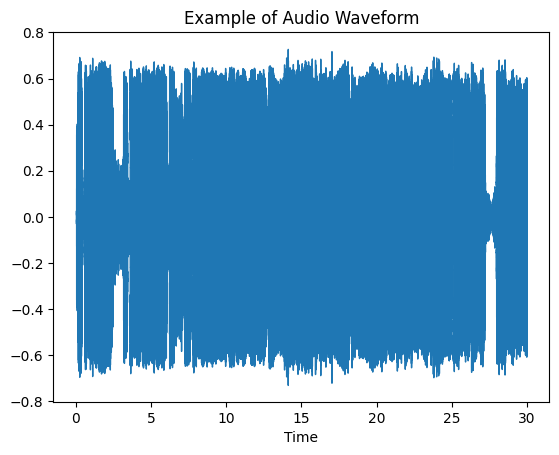

In [87]:
y, sr = librosa.load(FILE_PATH, sr=44100)
print("Sample rate: {0}Hz".format(sr))
print("Audio duration: {0}s".format(librosa.get_duration(y=y, sr=sr)))

librosa.display.waveshow(y, sr=sr)
plt.title("Example of Audio Waveform")

In [30]:
y_framed = librosa.util.frame(y, frame_length=2048, hop_length=512).T
print("Framed audio shape: {0}".format(y_framed.shape))

Framed audio shape: (2580, 2048)


Text(0.5, 0, 'Frame Length')

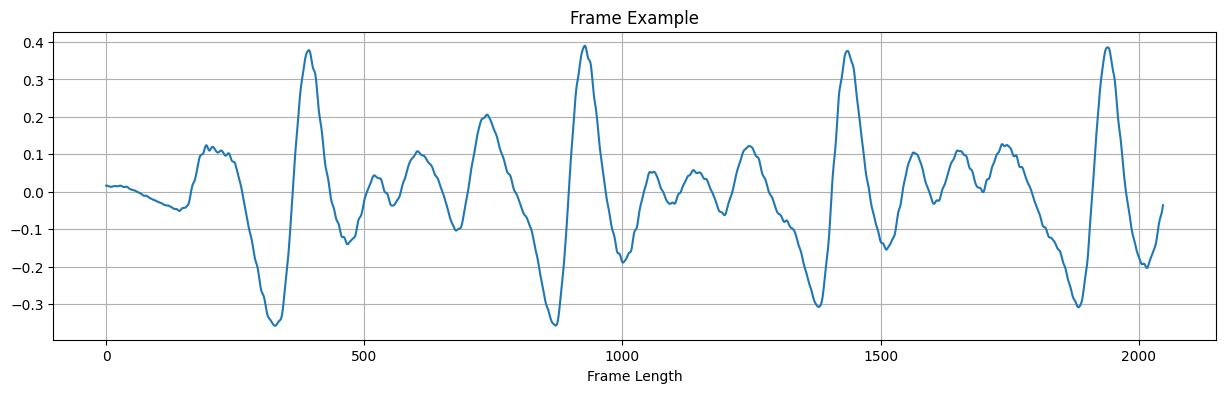

In [83]:
plt.figure(figsize=(15,4))
plt.plot(y_framed[1])
plt.grid(True)
plt.title("Frame Example")
plt.xlabel("Frame Length")

Text(0.5, 0, 'Frame Length')

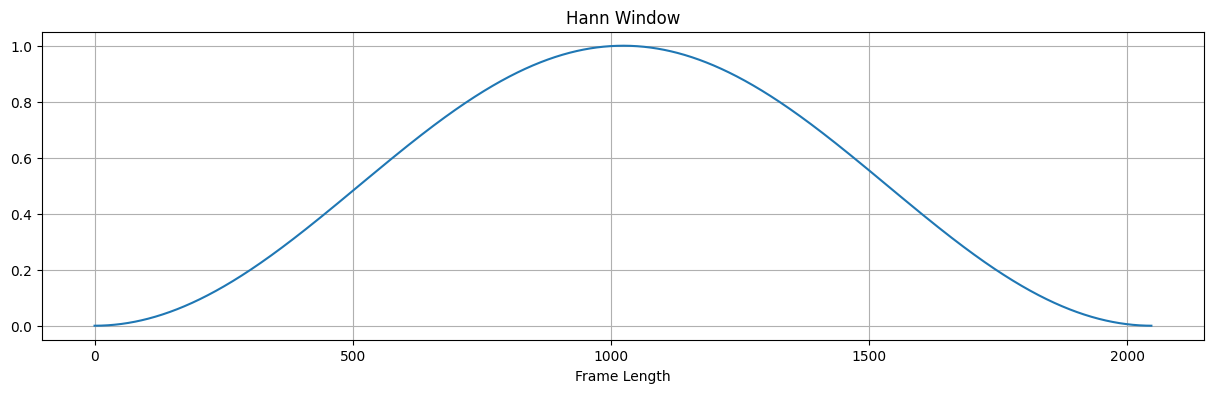

In [84]:
window = librosa.filters.get_window("hann", 2048, fftbins=True)
plt.figure(figsize=(15,4))
plt.plot(window)
plt.grid(True)
plt.title("Hann Window")
plt.xlabel("Frame Length")

In [85]:
y_windowed = y_framed * window

Text(0.5, 0, 'Frame Length')

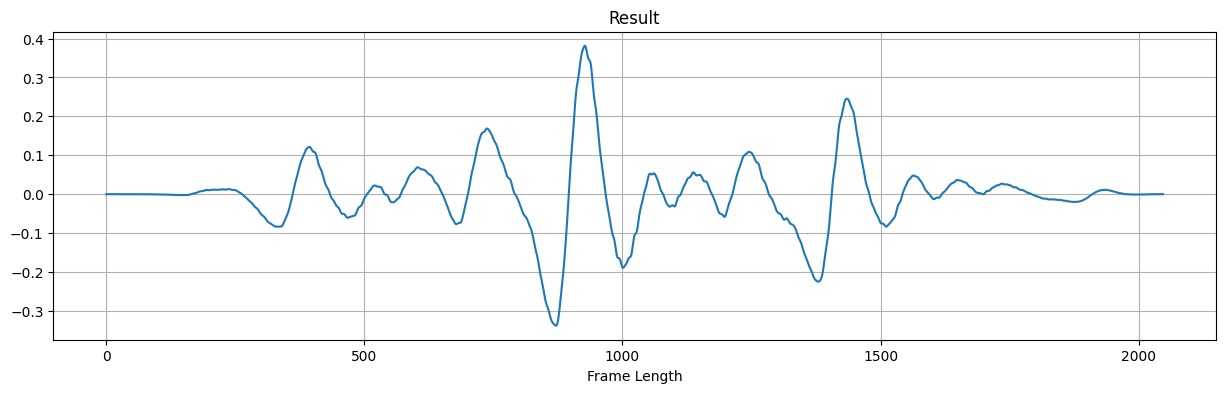

In [86]:
plt.figure(figsize=(15,4))
plt.plot(y_windowed[1])
plt.grid(True)
plt.title("Result")
plt.xlabel("Frame Length")

Text(0.5, 1.0, 'Spectogram Result')

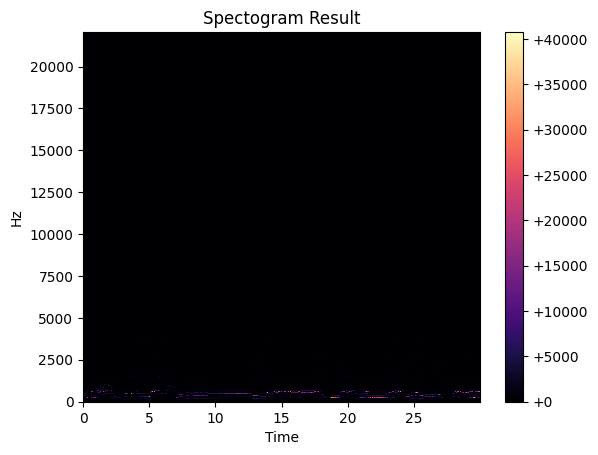

In [91]:
y_stft = librosa.stft(y)
y_spectogram = np.abs(y_stft) ** 2
librosa.display.specshow(y_spectogram, sr=sr, hop_length=512, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.f')
plt.title("Spectogram Result")

Text(0.5, 1.0, 'Example of Log-Amplitude Spectogram')

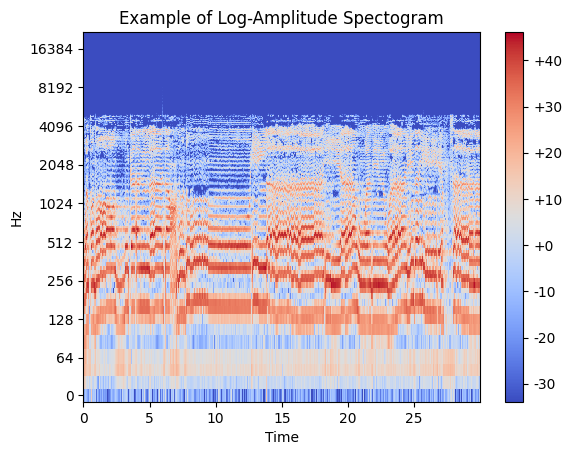

In [102]:
y_log_amplitude_spectogram = librosa.power_to_db(y_spectogram)
librosa.display.specshow(y_log_amplitude_spectogram, sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.f')
plt.title("Example of Log-Amplitude Spectogram")

Text(0, 0.5, 'Mel Filter Bands')

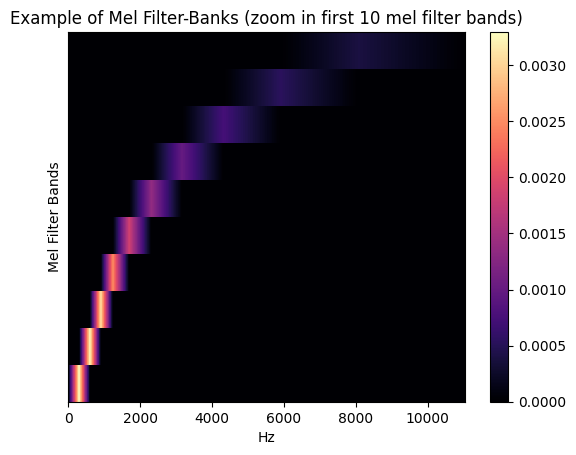

In [105]:
melfb = librosa.filters.mel(n_mels=10, sr=22050, n_fft=2048)
img = librosa.display.specshow(melfb, x_axis='linear')
plt.colorbar(img)
plt.title("Example of Mel Filter-Banks (zoom in first 10 mel filter bands)")
plt.ylabel("Mel Filter Bands")

Text(0.5, 1.0, 'Mel-Spectogram Result')

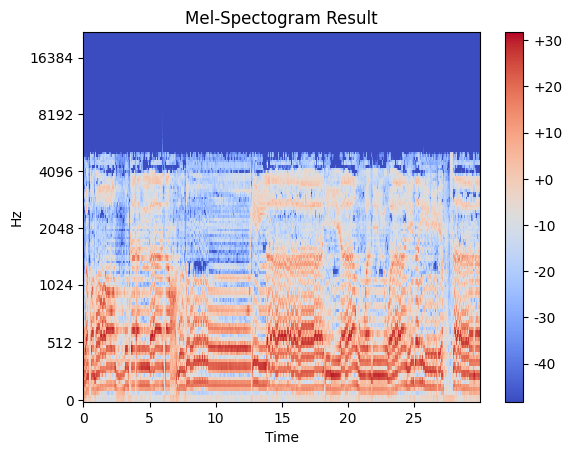

In [103]:
y_melspectogram = librosa.feature.melspectrogram(y=y, sr=sr)
y_log_melspectogram = librosa.power_to_db(y_melspectogram)
librosa.display.specshow(y_log_melspectogram, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.f')
plt.title("Mel-Spectogram Result")

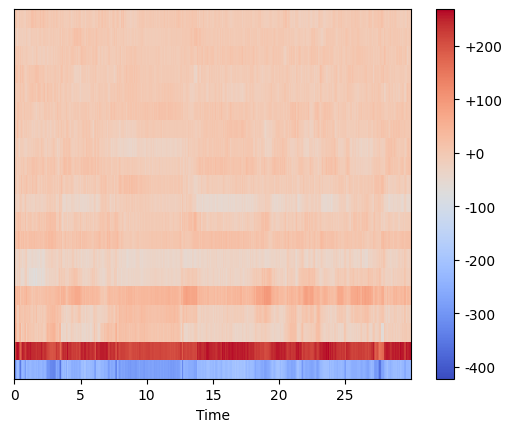

In [64]:
y_mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
librosa.display.specshow(y_mfcc, sr=sr, x_axis='time')
plt.colorbar(format='%+2.f')